# KPMG Task1

Check the quality of the data from the fictional client and write a e-mail report to them.
https://www.theforage.com/modules/m7W4GMqeT3bh9Nb2c/S3uFvbDL49EA43ukg

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Customer Demographic table

In [112]:
CD=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=3)

In [113]:
CD.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [114]:
# the default column make no sense
CD.drop("default",axis=1,inplace=True)

In [115]:
CD['Date'] = pd.to_datetime(CD.DOB)

In [116]:
def from_dob_to_age(born):
    today = dt.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [117]:
CD["age"]=CD['Date'].apply(lambda x: from_dob_to_age(x))

In [118]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

-missing values: 125 last names, 87 DOB and tenure

In [119]:
CD.sort_values("age")

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Date,age
1887,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,Yes,1.0,2002-01-26,18.0
469,470,Darbee,Klimowicz,Male,22,2001-12-19,Internal Auditor,Retail,Mass Customer,N,No,1.0,2001-12-19,18.0
2857,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0,2002-01-09,18.0
211,212,Nanice,Ellse,Female,21,2001-11-19,Desktop Support Technician,IT,Affluent Customer,N,No,1.0,2001-11-19,18.0
3948,3949,Costa,Sleightholm,Male,24,2001-12-19,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0,2001-12-19,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN,NaT,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN,NaT,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN,NaT,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN,NaT,NaN


In [120]:
#delete row 33, because customer age is 176 years 
CD.drop(33,inplace=True)


In [121]:
# drop the rows, where age is not available
CD.dropna(subset=["age"],inplace=True)

In [122]:
# drop the duplicated column
CD.drop(["Date"],axis=1,inplace=True)

In [123]:
CD.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,59.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0


In [124]:
# inconsistency in the gender column
CD.gender.unique()

array(['F', 'Male', 'Female', 'Femal', 'M'], dtype=object)

In [125]:
# correct the inconsistent gender column
CD.loc[(CD["gender"]=="Female") | (CD["gender"]=="Femal"),"gender"]= "F"
CD.loc[CD["gender"]=="Male","gender"]="M"

In [126]:
# check for duplicates
CD.duplicated().value_counts()

False    3912
dtype: int64

In [127]:
CD.wealth_segment.value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

### Transactions table

In [128]:
TA=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=1)

In [129]:
TA.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [130]:
TA.duplicated().value_counts()

False    20000
dtype: int64

In [131]:
TA.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [132]:
TA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

- missing values: 197 brnd, product_line.., 360 online_order

In [133]:
# drop rows with missing values
TA.dropna(subset=["standard_cost"],inplace=True)

### Customer Adress table

In [135]:
CA=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=4)

In [136]:
CA.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [137]:
CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [138]:
CA.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


- holes in the customer id: skipped from 21 to 24

In [139]:
CA.duplicated().value_counts()

False    3999
dtype: int64

In [140]:
CA.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [141]:
CA.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [142]:
# correct the inconsistent state column
CA.loc[CA.state=='New South Wales',"state"]="NSW"
CA.loc[CA.state=='Victoria',"state"]="VIC"

My final result is in the file "Email_Sprocket Central Pty Ltd_report.docx"

# Task 2

- Exploratory data analysis
- Feature engineering
- K-mean model

https://www.theforage.com/modules/m7W4GMqeT3bh9Nb2c/PH6AYWBqqJvSzDBbd

In [143]:
CD["age_cat"]=pd.cut(CD.age, [18,30,40,50,60,100],labels=["18-30","30-40","40-50","50-60","65+"],include_lowest=True)

In [144]:
CD["gender"]=CD.gender.map({"F":1,"M":0})
CD["owns_car"]=CD.owns_car.map({"Yes":1,"No":0})

In [145]:
# merge the Customer Demographic with the Customer Address table
CDA=pd.merge(CD, CA, how="left" )

In [146]:
CDA.dropna(subset=["state"],inplace=True)

In [147]:
CDA_TA=pd.merge(TA,CDA, how="left")

In [148]:
CDA_TA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19803 non-null  int64         
 1   product_id                           19803 non-null  int64         
 2   customer_id                          19803 non-null  int64         
 3   transaction_date                     19803 non-null  datetime64[ns]
 4   online_order                         19445 non-null  float64       
 5   order_status                         19803 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [149]:
CDA_TA.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,gender,past_3_years_bike_related_purchases,owns_car,tenure,age,postcode,property_valuation
count,19803.000000,19803.000000,19803.000000,19445.000000,19803.000000,19803.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000
mean,9993.979650,45.815937,1739.294955,0.500849,1107.997866,556.046951,0.512651,48.937135,0.501785,10.680499,42.653852,2988.643245,7.516014
std,5776.499961,30.569841,1011.946353,0.500012,582.770460,405.955660,0.499853,28.644584,0.500010,5.672739,12.604403,852.076050,2.826879
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,0.000000,0.000000,0.000000,1.000000,18.000000,2000.000000,1.000000
25%,4988.500000,18.000000,858.000000,0.000000,575.270000,215.140000,0.000000,24.000000,0.000000,6.000000,33.000000,2200.000000,6.000000
50%,9995.000000,45.000000,1738.000000,1.000000,1163.890000,507.580000,1.000000,48.000000,1.000000,11.000000,43.000000,2767.000000,8.000000
75%,15000.500000,72.000000,2615.000000,1.000000,1635.300000,795.100000,1.000000,73.000000,1.000000,15.000000,52.000000,3752.000000,10.000000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,1.000000,99.000000,1.000000,22.000000,88.000000,4883.000000,12.000000


In [150]:
CDA_TA.corr()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,gender,past_3_years_bike_related_purchases,owns_car,tenure,age,postcode,property_valuation
transaction_id,1.000000,-0.009972,0.002939,0.001693,-0.007115,-0.003291,-0.005926,-0.001670,-0.011562,0.006338,-0.005048,0.004270,-0.002522
product_id,-0.009972,1.000000,0.002793,-0.005471,0.091085,0.038765,-0.001641,-0.000799,-0.037942,-0.007472,-0.006695,0.010651,-0.003091
customer_id,0.002939,0.002793,1.000000,0.003215,0.010433,0.005365,0.017224,0.006903,0.024540,-0.022995,-0.025031,0.025131,-0.008104
online_order,0.001693,-0.005471,0.003215,1.000000,-0.000927,0.006934,-0.004358,0.002859,0.003260,0.011367,-0.004239,0.002380,-0.004542
list_price,-0.007115,0.091085,0.010433,-0.000927,1.000000,0.551539,-0.008946,0.007134,0.023145,-0.006266,-0.003112,0.011586,-0.010833
standard_cost,-0.003291,0.038765,0.005365,0.006934,0.551539,1.000000,-0.004932,-0.009396,0.017637,-0.014644,-0.000030,0.007461,-0.000449
gender,-0.005926,-0.001641,0.017224,-0.004358,-0.008946,-0.004932,1.000000,-0.026230,0.016835,0.005322,0.010263,-0.014183,0.014989
past_3_years_bike_related_purchases,-0.001670,-0.000799,0.006903,0.002859,0.007134,-0.009396,-0.026230,1.000000,0.002755,-0.021690,-0.040325,-0.017117,0.012233
owns_car,-0.011562,-0.037942,0.024540,0.003260,0.023145,0.017637,0.016835,0.002755,1.000000,-0.003548,-0.001076,-0.021585,0.053143
tenure,0.006338,-0.007472,-0.022995,0.011367,-0.006266,-0.014644,0.005322,-0.021690,-0.003548,1.000000,0.442005,0.009466,-0.018756


### EDA

In [151]:
CD.describe()

,customer_id,gender,past_3_years_bike_related_purchases,owns_car,tenure,age
count,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000
mean,1999.828221,0.521217,49.039366,0.504601,10.654652,42.733384
std,1154.903377,0.499614,28.768226,0.500043,5.658898,12.621255
min,1.000000,0.000000,0.000000,0.000000,1.000000,18.000000
25%,1002.750000,0.000000,24.000000,0.000000,6.000000,33.000000
50%,2000.000000,1.000000,48.000000,1.000000,11.000000,43.000000
75%,2997.250000,1.000000,73.000000,1.000000,15.000000,52.000000
max,4000.000000,1.000000,99.000000,1.000000,22.000000,88.000000


In [152]:
CD_cat = CD.loc[:, [ "job_industry_category", "wealth_segment", "deceased_indicator", "owns_car", "age_cat"]]

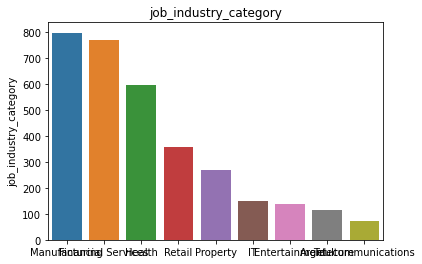

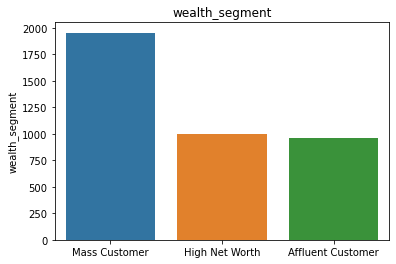

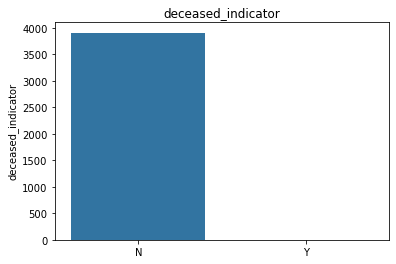

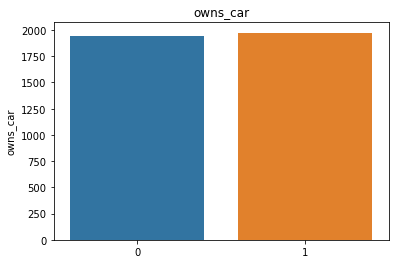

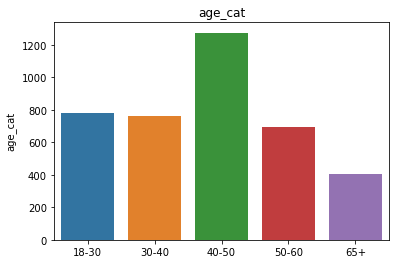

In [153]:
for i in CD_cat.columns:
    sns.barplot(CD_cat[i].value_counts().index,CD_cat[i].value_counts()).set_title(i)
    plt.show()

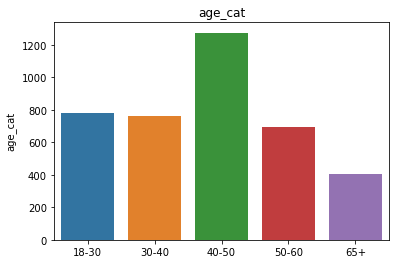

In [154]:
#plt.figure(figsize=(7, 6))
sns.barplot(CD_cat["age_cat"].value_counts().index,CD_cat["age_cat"].value_counts()).set_title("age_cat")
plt.savefig('age_cat.png')

In [155]:
CA.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


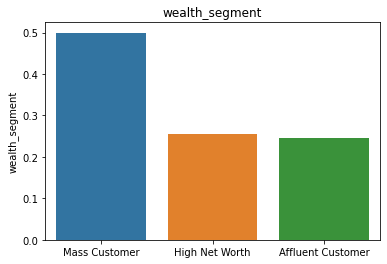

In [156]:
sns.barplot(CD_cat["wealth_segment"].value_counts(
).index, CD_cat["wealth_segment"].value_counts(normalize=True)).set_title("wealth_segment")
plt.savefig('wealth_segment.png')

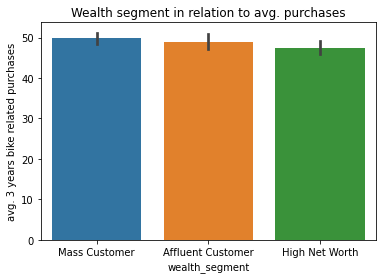

In [157]:
sns.barplot(x="wealth_segment", y="past_3_years_bike_related_purchases",  data=CD)
plt.ylabel("avg. 3 years bike related purchases")
plt.title("Wealth segment in relation to avg. purchases")
plt.savefig('wealth_segment_purchases.png')

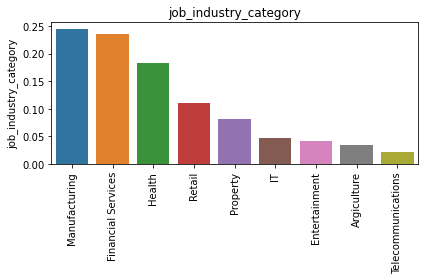

In [158]:
sns.barplot(CD_cat["job_industry_category"].value_counts(
).index, CD_cat["job_industry_category"].value_counts(normalize=True)).set_title("job_industry_category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('job_industry_category.png')

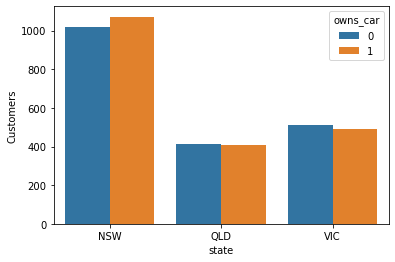

In [167]:
CDA["one"]=1
sns.barplot(data=CDA, x="state",y="one",hue="owns_car",estimator=sum)
plt.ylabel("Customers")
plt.savefig('state.png')

## Model deployment

### Featue engineering: RFM-scores

In [169]:
# calculate the profit
CDA_TA["profit"]=CDA_TA.list_price-CDA_TA.standard_cost
# time between last order
CDA_TA["recency"]= pd.Timestamp("2017-12-30")-CDA_TA.transaction_date
CDA_TA["recency"]=CDA_TA["recency"].dt.days

In [187]:
# product_id counts the orders of a customer
RFM_scores=CDA_TA.pivot_table(index="customer_id", values=["product_id","profit","recency"],aggfunc= {"product_id": "count", "profit":"sum","recency":"min"})

In [188]:
RFM_scores.rename(columns={"product_id":"frequency",
                          "profit":"monetary"},inplace=True)

In [189]:
RFM_scores.head()

,frequency,monetary,recency
customer_id,,,
1,11,3018.09,7
2,3,2226.26,128
3,8,3362.81,102
4,2,220.57,195
5,6,2394.94,16


In [232]:
RFM_scores.describe()

,frequency,monetary,recency
count,3494.000000,3494.000000,3494.000000
mean,5.667716,3128.301078,61.383528
std,2.311129,1770.536034,58.382404
min,1.000000,15.080000,0.001000
25%,4.000000,1841.370000,17.000000
50%,6.000000,2861.980000,44.000000
75%,7.000000,4183.107500,86.000000
max,14.000000,11668.950000,353.000000


### K-means model

In [211]:
# standarsize the variables
scaler = StandardScaler()
RFM_scores_scaled = scaler.fit_transform(RFM_scores)

In [191]:
# simulation for 1 to 10 clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(RFM_scores_scaled)
    wcss.append(kmeans.inertia_)

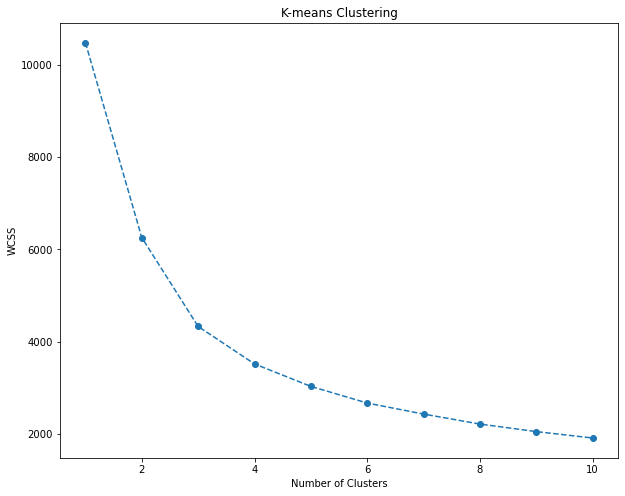

In [294]:
# elbow graph for determing the amount of clusters
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.savefig('elbow.png')
plt.show()

In [193]:
# 4 clusters will be used
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(RFM_scores_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [217]:
RFM_scores_kmeans = RFM_scores.copy()
RFM_scores_kmeans['cluster'] = kmeans.labels_

In [197]:
RFM_scores_kmeans.head()

,frequency,monetary,recency,Segment K-means
customer_id,,,,
1,11,3018.09,7,2
2,3,2226.26,128,3
3,8,3362.81,102,1
4,2,220.57,195,3
5,6,2394.94,16,1


In [218]:
RFM_scores_kmeans.cluster.value_counts()

1    1324
0    1106
2     547
3     517
Name: cluster, dtype: int64

In [220]:
RFM_scores_kmeans.groupby(['cluster']).mean()

,frequency,monetary,recency
cluster,,,
0,3.951175,1816.336650,43.993686
1,6.518127,3569.739607,44.101977
2,9.084095,5945.649726,33.848285
3,3.547389,1823.617002,171.974855


In [225]:
# name the Clusters
RFM_scores_kmeans['customer_category'] = RFM_scores_kmeans['cluster'].map({0:'C', # occasionally customers: customer,don't buy often, spend small amount of money, but bought recently
                                                            1:'B',  # potential top customers: don't buy often, but bought recently and spend large amount of money
                                                            2:'A', # top customers: most recent, high frequency and spend the most
                                                            3:'D'}) # churning out: low recency, low frequency and spend the least

In [228]:
RFM_scores_kmeans.head()

,frequency,monetary,recency,cluster,customer_category
customer_id,,,,,
1,11,3018.09,7.0,2,A
2,3,2226.26,128.0,3,D
3,8,3362.81,102.0,1,B
4,2,220.57,195.0,3,D
5,6,2394.94,16.0,1,B


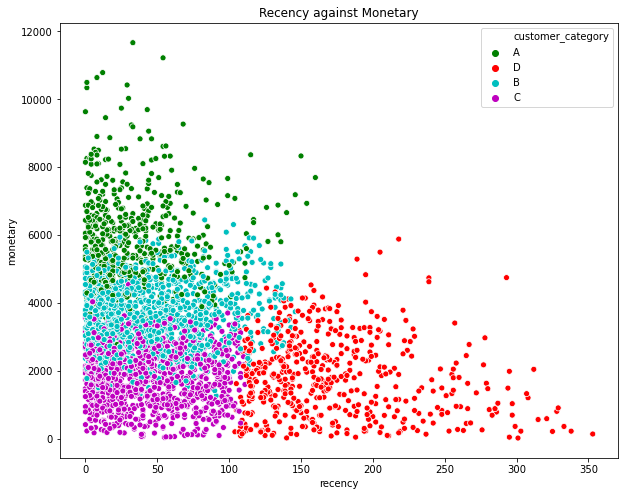

In [237]:
x_axis = RFM_scores_kmeans['recency']
y_axis = RFM_scores_kmeans['monetary']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = RFM_scores_kmeans['customer_category'], palette = ['g', 'r', 'c', 'm'])
plt.title('Recency against Monetary')
plt.savefig('RM.png')
plt.show()

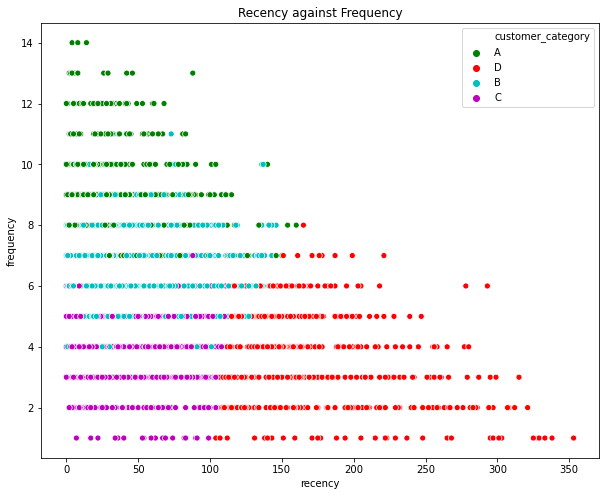

In [238]:
x_axis = RFM_scores_kmeans['recency']
y_axis = RFM_scores_kmeans['frequency']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = RFM_scores_kmeans['customer_category'], palette = ['g', 'r', 'c', 'm'])
plt.title('Recency against Frequency')
plt.savefig('RF.png')
plt.show()

In [239]:
RFM_scores_kmeans.head()

,frequency,monetary,recency,cluster,customer_category
customer_id,,,,,
1,11,3018.09,7.0,2,A
2,3,2226.26,128.0,3,D
3,8,3362.81,102.0,1,B
4,2,220.57,195.0,3,D
5,6,2394.94,16.0,1,B


In [298]:
temp=pd.merge(CDA,RFM_scores_kmeans,left_on="customer_id", right_index=True,how="left")

In [299]:
temp.dropna(subset=["customer_category"],inplace=True)

In [289]:
# temp.drop(["one","frequency","recency","monetary"],axis=1,inplace=True)

In [300]:
temp.set_index("customer_id",inplace=True)

In [301]:
# rename the clusters in order: 0 the worst and 3 the best category
temp['cluster']=temp['cluster'].map({0:1,
                    1:2,
                    2:3, 
                    3:0}) 

In [292]:
# variables have no correlation with cluster
temp.corr()

,gender,past_3_years_bike_related_purchases,owns_car,tenure,age,postcode,property_valuation,cluster
gender,1.000000,-0.028507,0.004974,-0.002355,0.009817,-0.007515,0.006978,-0.020066
past_3_years_bike_related_purchases,-0.028507,1.000000,-0.000604,-0.013080,-0.032124,-0.009562,0.009822,0.014600
owns_car,0.004974,-0.000604,1.000000,-0.008788,-0.000587,-0.017137,0.046060,0.007160
tenure,-0.002355,-0.013080,-0.008788,1.000000,0.434971,0.002614,-0.014703,0.017084
age,0.009817,-0.032124,-0.000587,0.434971,1.000000,-0.027005,0.021938,0.004462
postcode,-0.007515,-0.009562,-0.017137,0.002614,-0.027005,1.000000,-0.520377,0.000009
property_valuation,0.006978,0.009822,0.046060,-0.014703,0.021938,-0.520377,1.000000,-0.013310
cluster,-0.020066,0.014600,0.007160,0.017084,0.004462,0.000009,-0.013310,1.000000


In [295]:
# there is no specific feauture which seperate the clusters
temp.groupby("cluster").mean().round(2)

,gender,past_3_years_bike_related_purchases,owns_car,tenure,age,postcode,property_valuation
cluster,,,,,,,
0,0.54,47.28,0.49,10.60,42.35,2987.12,7.64
1,0.52,49.35,0.50,10.57,42.75,2986.18,7.55
2,0.51,49.30,0.52,10.72,42.59,2997.48,7.41
3,0.50,49.00,0.48,10.88,42.70,2978.50,7.59


In [303]:
temp.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_cat,address,postcode,state,country,property_valuation,one,frequency,monetary,recency,cluster,customer_category
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,1,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,1,11.0,67.0,65+,060 Morning Avenue,2016.0,NSW,Australia,10.0,1,11.0,3018.09,7.0,3,A
2,Eli,Bockman,0,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,1,16.0,39.0,30-40,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,1,3.0,2226.26,128.0,0,D
4,Talbot,NaN,0,33,1961-10-03,NaN,IT,Mass Customer,N,0,7.0,59.0,50-60,0 Holy Cross Court,4211.0,QLD,Australia,9.0,1,2.0,220.57,195.0,0,D
5,Sheila-kathryn,Calton,1,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,1,8.0,43.0,40-50,17979 Del Mar Point,2448.0,NSW,Australia,4.0,1,6.0,2394.94,16.0,2,B
6,Curr,Duckhouse,0,35,1966-09-16,NaN,Retail,High Net Worth,N,1,13.0,54.0,50-60,9 Oakridge Court,3216.0,VIC,Australia,9.0,1,5.0,3946.55,64.0,2,B


See results in "Module_2_Template_slide.pptx"

# Task 3

Create a dasboard

https://www.theforage.com/modules/m7W4GMqeT3bh9Nb2c/RBG3BtaHDFwHqofFs

In [257]:
# import the NewCustomer table
NC=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=2)

In [ ]:
NC.head()

In [258]:
# drop the unnamed columns
NC.drop(NC.columns[NC.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [305]:
# merge the NC und temp table in a excel file
writer = pd.ExcelWriter('task3.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
temp.to_excel(writer, sheet_name='all_tables')
NC.to_excel(writer, sheet_name='NC')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

See results in "KPMG_Dashboard.pbix"